In [1]:
import pandas as pd

In [95]:
df = pd.read_csv("titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.shape

(891, 15)

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [21]:
df.head(1)
df.tail(1)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [24]:
df['survived'] = 1
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,1,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,1,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q3: Select sex, fare, survived columns

In [26]:
df[['sex','fare' , 'survived']]

,sex,fare,survived
0,male,7.2500,1
1,female,71.2833,1
2,female,7.9250,1
3,female,53.1000,1
4,male,8.0500,1
...,...,...,...
886,male,13.0000,1
887,female,30.0000,1
888,female,23.4500,1
889,male,30.0000,1


new_column# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [35]:
df['new_column'] = df['class'] + df['embark_town']
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,1,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,ThirdSouthampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,FirstCherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,ThirdSouthampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,FirstSouthampton
4,1,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,ThirdSouthampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,SecondSouthampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,FirstSouthampton
888,1,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,ThirdSouthampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,FirstCherbourg


# Q5: Remove new_column from the DataFrame

In [39]:
df.drop('new_column', axis=1, inplace=True)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,1,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Q6: Filter DataFrame for rows of survived Males only 

In [77]:
df[(df.survived == 1) & (df.sex == 'male')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,1,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,1,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,1,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,1,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,1,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,1,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q7: The total number of males who survived 

In [88]:
df[(df.survived == 1) & (df.sex == 'male')].count()

survived       577
pclass         577
sex            577
age            453
sibsp          577
parch          577
fare           577
embarked       577
class          577
who            577
adult_male     577
deck           106
embark_town    577
alive          577
alone          577
dtype: int64

# Q8: How many values in each class?

In [61]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

# Import Seaborn

In [89]:
import seaborn as sns

# Q9: Draw barplot represents survived people based on sex

<AxesSubplot:xlabel='sex', ylabel='survived'>

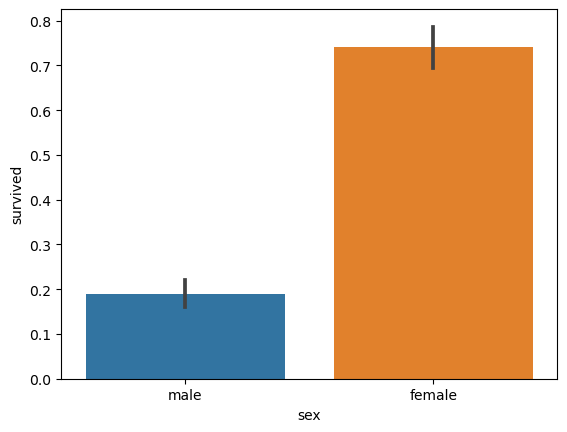

In [96]:

sns.barplot(x='sex', y='survived',data=df)


# Q10: Draw catplot represents survived people based on embarked

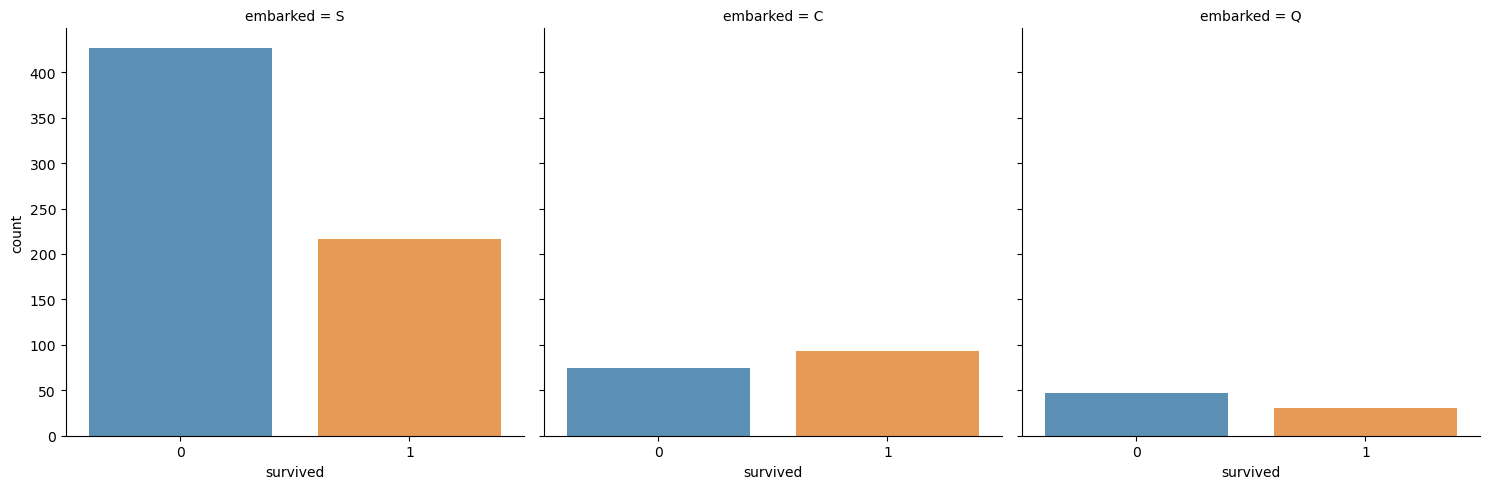

In [125]:
g = sns.catplot(
    data=df,
    kind="count", 
   x="survived",
    col="embarked"
   , 
    alpha=.8, 
    height= 5
)


# Q11: Draw boxplot represents distribution of male and female based on age and pclass

<AxesSubplot:xlabel='sex', ylabel='age'>

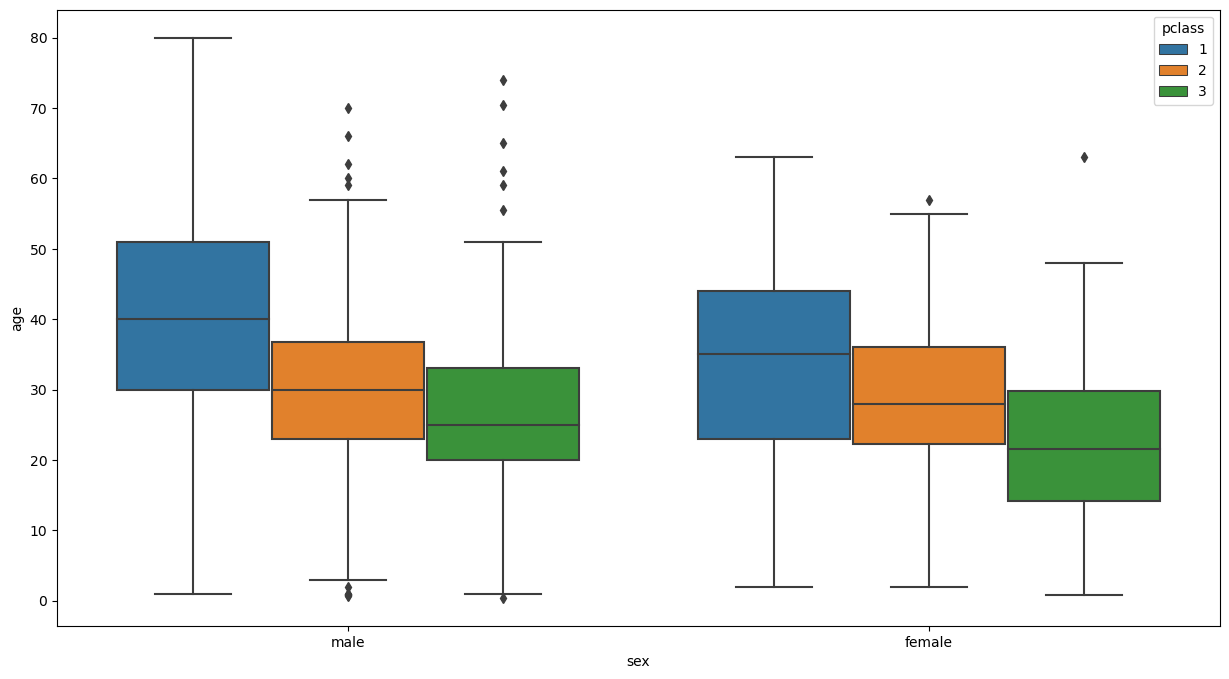

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

sns.boxplot(
    hue="pclass",
    x="sex", 
    y="age",
    data=df)

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

In [155]:

x = sns.heatmap(df, linewidth = 0.5 , cmap = 'coolwarm')

ValueError: could not convert string to float: 'male'

# Q13: Draw factorplot represents the relation between sibsp and survived columns

C:\Users\hudaa\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


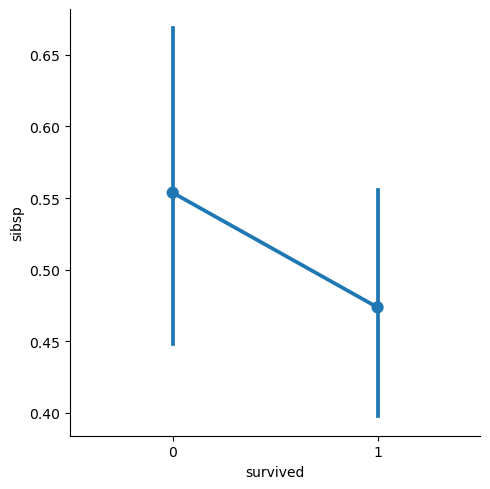

In [141]:
sns.factorplot(x ='survived', y ='sibsp', data = df);

# Q14: Draw extra insights [Optional]

<AxesSubplot:xlabel='sex', ylabel='age'>

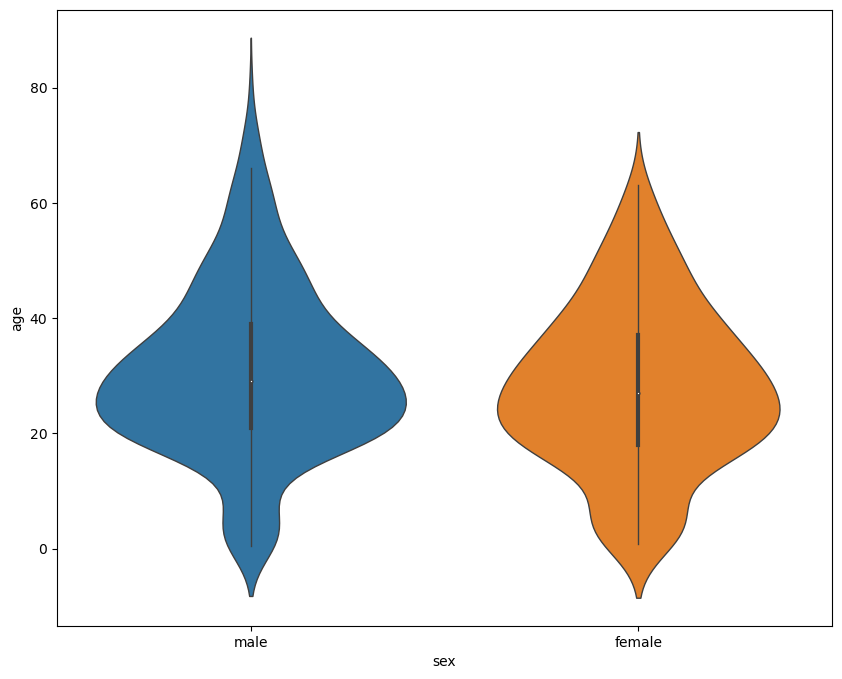

In [151]:
plt.figure(figsize=(10,8))

sns.violinplot(
    data=df, 
   y="age", 
   x="sex", 
   
    linewidth=1
)
